In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
drive = pd.read_csv('cab_rides.csv')

In [238]:
# Displaying top 500 rows
pd.options.display.max_rows = 500

In [239]:
drive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [240]:
# Top 10 drives having all the details related to it.
drive.head(10)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


In [241]:

drive.tail(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
693066,1.0,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.0,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.0,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool


In [242]:
drive.shape


(693071, 10)

In [243]:
print(drive.nunique())

distance               549
cab_type                 2
time_stamp          114335
destination             12
source                  12
price                  147
surge_multiplier         7
id                  693071
product_id              13
name                    13
dtype: int64


In [244]:
null_vals = drive.isna().sum().reset_index()
null_vals.columns = ['Headings', 'Missing_values']
null_vals

,Headings,Missing_values
0,distance,0
1,cab_type,0
2,time_stamp,0
3,destination,0
4,source,0
5,price,55095
6,surge_multiplier,0
7,id,0
8,product_id,0
9,name,0


In [245]:
drive.dropna(inplace= False)


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


C:\Users\vihaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'price')

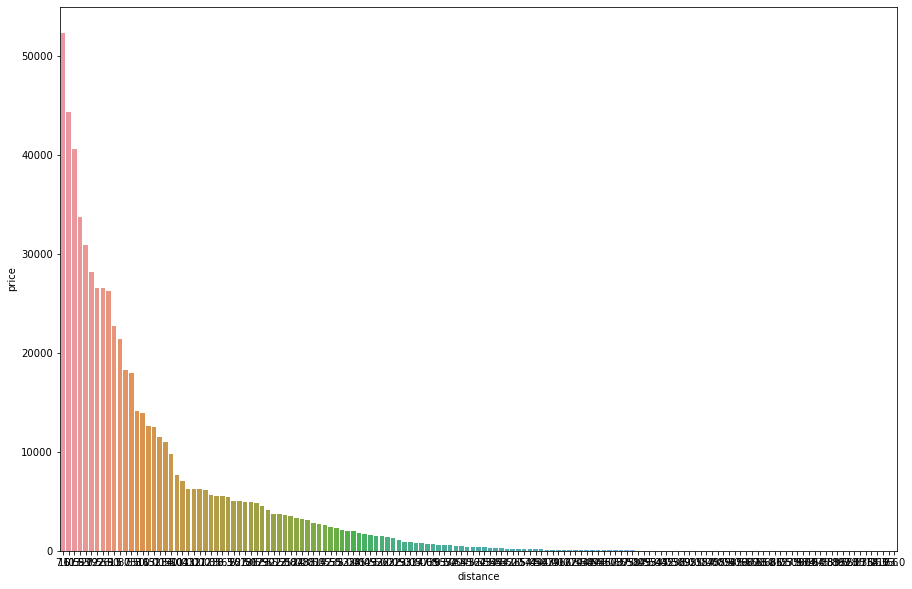

In [246]:
plt.figure(figsize=(15,10))
sns.countplot(drive['price'],order=drive['price'].value_counts().index)
plt.xlabel("distance")
plt.ylabel("price")

### Linear Regression

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
from sklearn.linear_model import LinearRegression

#### Taking x axis as distance and y axis as price

In [249]:
X = np.array(drive['distance']).reshape(-1,1)
y = np.array(drive['price']).reshape(-1,1)

X.shape, y.shape

((693071, 1), (693071, 1))

In [250]:
from numpy.linalg import inv



const = np.ones(shape=y.shape)
mat = np.concatenate( (const, X), axis=1)

# first 5 examples
mat[:5,:]

array([[1.  , 0.44],
       [1.  , 0.44],
       [1.  , 0.44],
       [1.  , 0.44],
       [1.  , 0.44]])

In [251]:
betas = inv(mat.transpose().dot(mat)).dot(mat.transpose()).dot(y)
b0, b1 = betas

print(f'Beta 0: {np.round(b0[0],3)}')
print(f'Beta 1: {np.round(b1[0],3)}')

Beta 0: nan
Beta 1: nan


In [252]:

yhat = mat.dot(betas)
yhat[:5, :]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]])

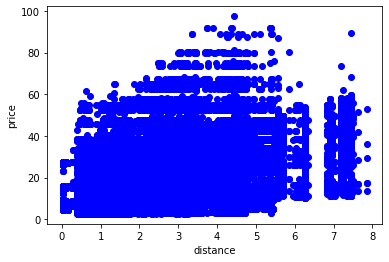

In [253]:
plt.plot(X, y, 'bo')
plt.plot(X, yhat, 'r')
plt.xlabel('distance')
plt.ylabel('price')

plt.show()

In [254]:
import statsmodels.api as smf

simpleModel = smf.OLS(y, mat).fit()
print(simpleModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 11 Oct 2021   Prob (F-statistic):                nan
Time:                        23:43:31   Log-Likelihood:                    nan
No. Observations:              693071   AIC:                               nan
Df Residuals:                  693069   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

In [255]:
X=drive.iloc[:,0]
y=drive.iloc[:,6]

In [256]:
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 554,456
Test samples: 138,615


In [257]:
X_training=np.array(X_training)
y_training=np.array(y_training)


In [258]:
X_training=X_training.reshape(-1,1)
y_training=y_training.reshape(-1,1)

In [259]:
regressor= LinearRegression()

In [260]:
regressor.fit(X_training,y_training)

LinearRegression()

In [261]:
X_test=np.array(X_test)

In [262]:
X_test=X_test.reshape(-1,1)

In [263]:
regressor.predict(X_test)

array([[1.01624455],
       [1.01433985],
       [1.01064708],
       ...,
       [1.01467026],
       [1.01799375],
       [1.01222136]])

In [264]:
from sklearn.metrics import mean_squared_error

predictions=regressor.predict(X_test)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
rmse

0.09220261267176925

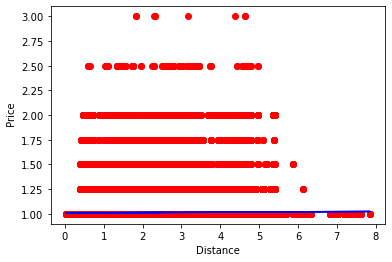

In [265]:
#vizualizing train set
plt.scatter(X_training,y_training,color="red")
plt.xlabel("Distance")
plt.ylabel(" Price")
plt.plot(X_training, regressor.predict(X_training),color="blue") 
plt.show()

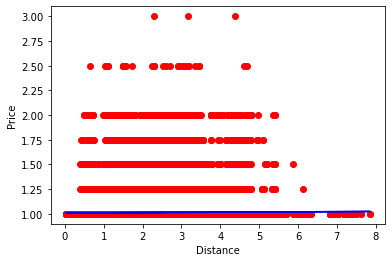

In [266]:
# Visualising test dataset
plt.scatter(X_test,y_test,color="red")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.plot(X_training, regressor.predict(X_training),color="blue")
plt.show()

In [275]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
abs = Ridge(alpha=1.0)

In [276]:
p = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [277]:
q = cross_val_score(clf, X_training, y_training, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [278]:
r = absolute(s)
print('Mean MAE: %.3f (%.3f)' % (mean(s), std(s)))

Mean MAE: 0.027 (0.000)


In [279]:
abs.fit(X_training, y_training)

Ridge()

In [280]:
train_preds = clf.predict(X_training)

In [281]:
train_preds = np.clip(train_preds, 0, 10)
train_preds.mean()

1.013853218289639

In [282]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_training, y_training, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.027 (0.000)
